# Project 1 - Iris Dataset

This project uses the iris dataset to classify 3 types of plants using 4 properties sepal length, sepal width , petal length and petal width .

Intially we perform Exploratory Data Analysis and explore the features via the use of histograms and other types of plots to get an idea about the Dataset we work with 


In [4]:
# EDA for Iris dataset  
# Importing packages such matplotlib and seaborn for plotting histograms and numpy, and pandas for data analysis 
import matplotlib.pyplot as plt
import numpy as np 
import pandas as pd 
import seaborn as sns


#This line is used to inform  matplotlib that the graph should be drawn in the notebook not in seperate window
%matplotlib inline

# The dataset is read from this line into a pandas dataframe 
iris = pd.read_csv('iris.csv')
iris.head()


,sepal.length,sepal.width,petal.length,petal.width,variety
0,5.1,3.5,1.4,0.2,Setosa
1,4.9,3.0,1.4,0.2,Setosa
2,4.7,3.2,1.3,0.2,Setosa
3,4.6,3.1,1.5,0.2,Setosa
4,5.0,3.6,1.4,0.2,Setosa


In [5]:
# Checking the Datatypes of the Iris Dataset
iris.dtypes

sepal.length    float64
sepal.width     float64
petal.length    float64
petal.width     float64
variety          object
dtype: object

In [6]:
# Checking the shape of the iris dataframe
iris.shape

(150, 5)

In [7]:
# Checking if there are any missing data points 
iris.describe()

,sepal.length,sepal.width,petal.length,petal.width
count,150.000000,150.000000,150.000000,150.000000
mean,5.843333,3.057333,3.758000,1.199333
std,0.828066,0.435866,1.765298,0.762238
min,4.300000,2.000000,1.000000,0.100000
25%,5.100000,2.800000,1.600000,0.300000
50%,5.800000,3.000000,4.350000,1.300000
75%,6.400000,3.300000,5.100000,1.800000
max,7.900000,4.400000,6.900000,2.500000


Then we run a group by the variety  feature to check the mean values of the different kinds of flowers 

In [8]:
iris.groupby('variety').mean()

,sepal.length,sepal.width,petal.length,petal.width
variety,,,,
Setosa,5.006,3.428,1.462,0.246
Versicolor,5.936,2.770,4.260,1.326
Virginica,6.588,2.974,5.552,2.026


In [9]:
iris.groupby(iris['sepal.length'].isnull()).mean()

,sepal.length,sepal.width,petal.length,petal.width
sepal.length,,,,
False,5.843333,3.057333,3.758,1.199333


In [10]:
iris.groupby(iris['sepal.width'].isnull()).mean()

,sepal.length,sepal.width,petal.length,petal.width
sepal.width,,,,
False,5.843333,3.057333,3.758,1.199333


In [11]:
iris.groupby(iris['petal.length'].isnull()).mean()



,sepal.length,sepal.width,petal.length,petal.width
petal.length,,,,
False,5.843333,3.057333,3.758,1.199333


In [12]:
iris.groupby(iris['petal.width'].isnull()).mean()

,sepal.length,sepal.width,petal.length,petal.width
petal.width,,,,
False,5.843333,3.057333,3.758,1.199333


Here we explore the features using a historgram to again an understanding of how the different features have been distributed .
In addition to that catergorical plots are used to observe the relationship of the features across the 3 varities of flowers 

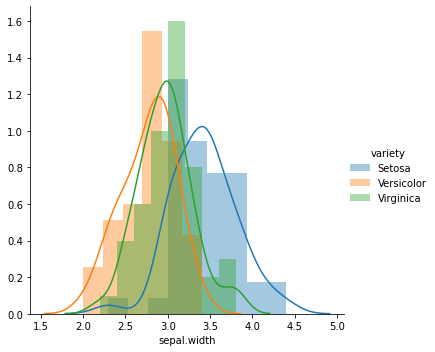

In [13]:
sns.FacetGrid(iris,hue="variety",height=5).map(sns.distplot,"sepal.width").add_legend()
plt.show()

The histogram above for the feature sepal width shows does not show a clear distribution among the 3 classes of flowers. So using sepal width would not allow us to clearly classify a new plant entered to be classified . 

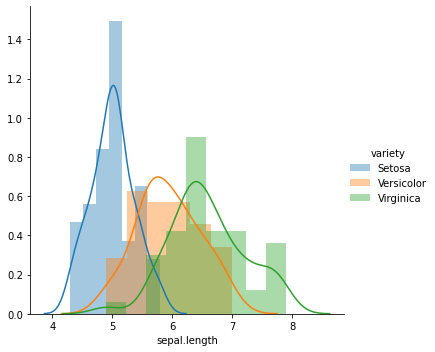

In [14]:
sns.FacetGrid(iris,hue="variety",height=5).map(sns.distplot,"sepal.length").add_legend()
plt.show()

The histogram shows that Setosa has been classified from the other 2 varities using the sepal length. The average values for both Versicolor and Virginica are quite similar

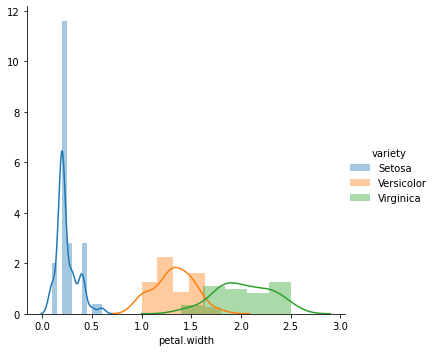

In [15]:
sns.FacetGrid(iris,hue="variety",height=5).map(sns.distplot,"petal.width").add_legend()
plt.show()

Similar to the previous histogram Setosa can be clearly identified but for the feature petal width , Versicolor flowers have an average petal width less than that of Virginica and an average petal width larger than that of the Setosa variety of flowers. 

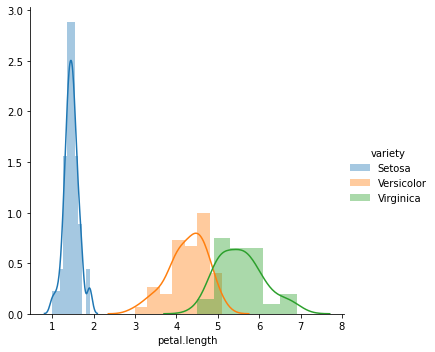

In [16]:
sns.FacetGrid(iris,hue="variety",height=5).map(sns.distplot,"petal.length").add_legend()
plt.show()

<Figure size 432x288 with 0 Axes>

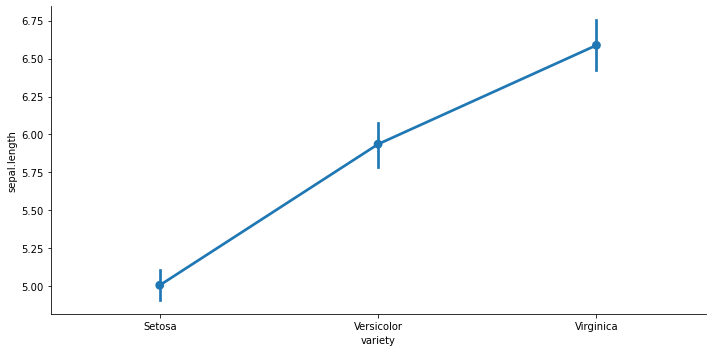

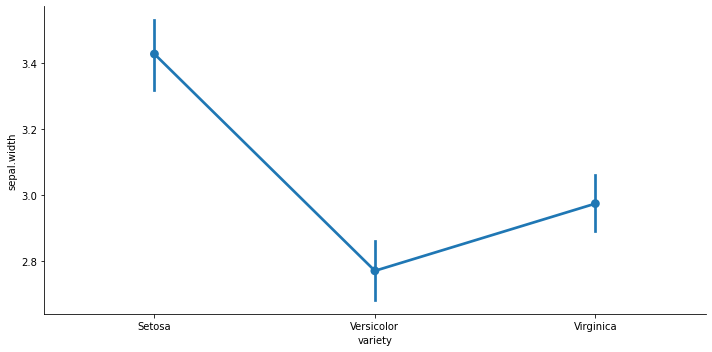

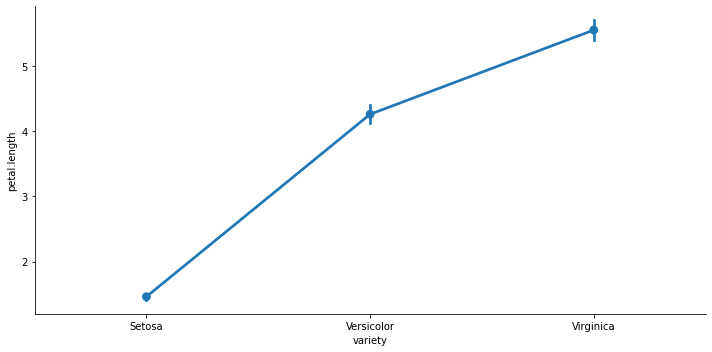

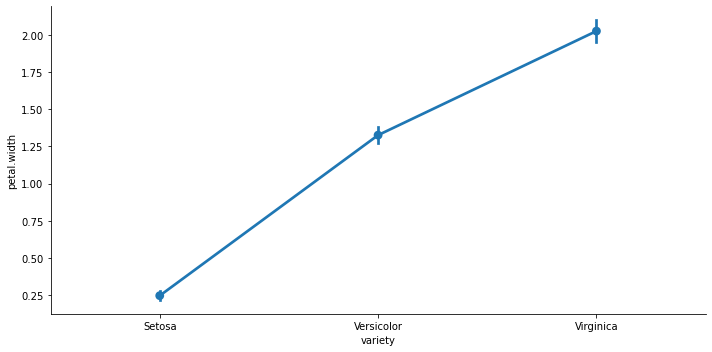

In [17]:
for i, col in enumerate(['sepal.length', 'sepal.width','petal.length','petal.width']):
    plt.figure(i)
    sns.catplot(x='variety', y=col, data=iris, kind='point', aspect=2,)

The catergorical plots above gives a good idea how the 4 different features can be used to catergorize the 3 different varities of plants. For example the petal width increases with each of variety of flowers.


Next the target variable which is the variety of flowers is converted into a numerical value and the dataset is spilt into validation , training and test set . Intially it is spilt into a ratio of 60 - 20 - 20. 

In [18]:
iris.replace(['Setosa', 'Versicolor', 'Virginica',], 
                     [1, 2, 3],inplace=True)

In [19]:
features = iris.drop('variety', axis=1)
labels = iris['variety']
features

# Splitting the dataset into train,validation and test dataset 
from sklearn.model_selection import train_test_split


In [20]:
X_train, X_test, y_train, y_test = train_test_split(features, labels, test_size=0.4, random_state=12)
X_test, X_val, y_test, y_val = train_test_split(X_test, y_test, test_size=0.5, random_state=12)

In [18]:
for dataset in [y_train, y_val, y_test]:
    print(round(len(dataset) / len(labels), 2))

0.6
0.2
0.2


In [19]:
# The function below is used to print the best hyperparameter values for the models created. 
def print_results(results):
    print('BEST PARAMS: {}\n'.format(results.best_params_))

    means = results.cv_results_['mean_test_score']
    stds = results.cv_results_['std_test_score']
    for mean, std, params in zip(means, stds, results.cv_results_['params']):
        print('{} (+/-{}) for {}'.format(round(mean, 3), round(std * 2, 3), params))

Below KFold Cross Validation is done with the use of 5 fold Cross Validation for 3 algorithims using Grid Search CV method  . 
1. RandomForestClassifer 
2. Logistic Regression 
3. Support Vector Machine 

The optimal hyperparameters for these algorithims are found using hyperparameter tuning methods. The print results function prints model results and also prints out the best estimator for the model. 

In [20]:
# K Fold Cross Validation 
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import GridSearchCV
import joblib
rf = RandomForestClassifier()
parameters = {
    'n_estimators': [5, 50, 100],
    'max_depth': [2, 10, 20, None]
}

cv = GridSearchCV(rf, parameters, cv=5)

cv.fit(X_train, y_train.values.ravel())

print_results(cv)

BEST PARAMS: {'max_depth': 20, 'n_estimators': 50}

0.922 (+/-0.151) for {'max_depth': 2, 'n_estimators': 5}
0.933 (+/-0.13) for {'max_depth': 2, 'n_estimators': 50}
0.944 (+/-0.122) for {'max_depth': 2, 'n_estimators': 100}
0.933 (+/-0.109) for {'max_depth': 10, 'n_estimators': 5}
0.933 (+/-0.13) for {'max_depth': 10, 'n_estimators': 50}
0.944 (+/-0.122) for {'max_depth': 10, 'n_estimators': 100}
0.933 (+/-0.13) for {'max_depth': 20, 'n_estimators': 5}
0.956 (+/-0.13) for {'max_depth': 20, 'n_estimators': 50}
0.956 (+/-0.13) for {'max_depth': 20, 'n_estimators': 100}
0.933 (+/-0.109) for {'max_depth': None, 'n_estimators': 5}
0.933 (+/-0.13) for {'max_depth': None, 'n_estimators': 50}
0.922 (+/-0.113) for {'max_depth': None, 'n_estimators': 100}


Next the model with best hyperparameter, written to a pkl file using the joblib import.

In [21]:
cv.best_estimator_

joblib.dump(cv.best_estimator_, 'RF_model.pkl')

['RF_model.pkl']

In [22]:
#Logistic Regression 
from sklearn.linear_model import LogisticRegression
import warnings
warnings.filterwarnings('ignore', category=FutureWarning)
warnings.filterwarnings('ignore', category=DeprecationWarning)

lr = LogisticRegression()
parameters = {
    'C': [0.001, 0.01, 0.1, 1, 10, 100, 1000]
}

cv = GridSearchCV(lr, parameters, cv=5)
cv.fit(X_train, y_train.values.ravel())

print_results(cv)




C:\Users\Dona\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:763: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
C:\Users\Dona\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:763: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i 

BEST PARAMS: {'C': 1}

0.389 (+/-0.0) for {'C': 0.001}
0.789 (+/-0.13) for {'C': 0.01}
0.922 (+/-0.113) for {'C': 0.1}
0.956 (+/-0.083) for {'C': 1}
0.956 (+/-0.083) for {'C': 10}
0.944 (+/-0.122) for {'C': 100}
0.922 (+/-0.113) for {'C': 1000}


C:\Users\Dona\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:763: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
C:\Users\Dona\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:763: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i 

In [23]:
cv.best_estimator_

joblib.dump(cv.best_estimator_, 'LR_model.pkl')

['LR_model.pkl']

In [24]:
#Support Vector Machine 
from sklearn.svm import SVC

svc= SVC()

parameters = {
    'kernel': ['linear', 'rbf'],
    'C': [0.1, 1, 10]
}


cv = GridSearchCV(svc, parameters, cv=5)
cv.fit(X_train, y_train.values.ravel())

print_results(cv)


BEST PARAMS: {'C': 1, 'kernel': 'rbf'}

0.956 (+/-0.13) for {'C': 0.1, 'kernel': 'linear'}
0.778 (+/-0.199) for {'C': 0.1, 'kernel': 'rbf'}
0.967 (+/-0.089) for {'C': 1, 'kernel': 'linear'}
0.978 (+/-0.089) for {'C': 1, 'kernel': 'rbf'}
0.967 (+/-0.054) for {'C': 10, 'kernel': 'linear'}
0.967 (+/-0.089) for {'C': 10, 'kernel': 'rbf'}


In [25]:
cv.best_estimator_
joblib.dump(cv.best_estimator_, 'SVM_model.pkl')

['SVM_model.pkl']

Next the 3 models are evaulted on the validation test and test test for 3 properties. 
1. Accurary  
2. Precision  
3. Recall

In [26]:
# Model Comparison

from sklearn.metrics import accuracy_score, precision_score, recall_score
from time import time

In [27]:
models = {}

for mdl in ['LR', 'SVM','RF']:
    models[mdl] = joblib.load('{}_model.pkl'.format(mdl))

In [28]:
models


{'LR': LogisticRegression(C=1),
 'SVM': SVC(C=1),
 'RF': RandomForestClassifier(max_depth=20, n_estimators=50)}

In [29]:
def evaluate_model(name, model, features, labels):
    start = time()
    pred = model.predict(features)
    end = time()
    accuracy = accuracy_score(labels, pred)
    precision = precision_score(labels, pred, average='weighted')
    recall = recall_score(labels, pred, average='weighted')
    print('{} -- Accuracy: {} / Precision: {} / Recall: {} / Latency: {}ms'.format(name,
                                                                                   accuracy,
                                                                                   precision,
                                                                                   recall,
                                                                                   round((end - start)*1000, 1)))

In [30]:
for name, mdl in models.items():
    evaluate_model(name, mdl, X_val, y_val)

LR -- Accuracy: 0.9666666666666667 / Precision: 0.9708333333333333 / Recall: 0.9666666666666667 / Latency: 1.5ms
SVM -- Accuracy: 0.9666666666666667 / Precision: 0.9708333333333333 / Recall: 0.9666666666666667 / Latency: 1.5ms
RF -- Accuracy: 0.9333333333333333 / Precision: 0.9481481481481481 / Recall: 0.9333333333333333 / Latency: 6.4ms


According to the results above, the Logistic Regression model and the Support Vector Machine performed the best because it accurately predicted the values with an accuray of nearly 100% and a precision of 100%  on the validation test data. But for a smaller dataset such iris dataset this is latency change is very minute and this classifcation problem isnt affected but these latency gap.

In [31]:
for name, mdl in models.items():
    evaluate_model(name, mdl, X_test, y_test)


LR -- Accuracy: 1.0 / Precision: 1.0 / Recall: 1.0 / Latency: 2.0ms
SVM -- Accuracy: 1.0 / Precision: 1.0 / Recall: 1.0 / Latency: 1.5ms
RF -- Accuracy: 0.9666666666666667 / Precision: 0.9703703703703703 / Recall: 0.9666666666666667 / Latency: 6.4ms


According to the results above, the Support Vector Machine model performed the best because it accurately predicted the values with an accuray of 100% and a precision of 100% with the lowest latency (this is the time spent to give the output) on the testing test data.


Next the Dataset is spilt into ratio of 80 : 10 : 10   to compare which of the 2 datasets perform better 

In [32]:
# Ratio 80-10-10 train spilt 
X_train, X_test, y_train, y_test = train_test_split(features, labels, test_size=0.2, random_state=12)
X_test, X_val, y_test, y_val = train_test_split(X_test, y_test, test_size=0.5, random_state=12)


for dataset in [y_train, y_val, y_test]:
    print(round(len(dataset) / len(labels), 2))




0.8
0.1
0.1


In [33]:
# Random Forest Classifer 
rf = RandomForestClassifier()
parameters = {
    'n_estimators': [5, 50, 100],
    'max_depth': [2, 10, 20, None]
}

cv2 = GridSearchCV(rf, parameters, cv=5)

cv2.fit(X_train, y_train.values.ravel())

print_results(cv2)

BEST PARAMS: {'max_depth': 2, 'n_estimators': 5}

0.967 (+/-0.062) for {'max_depth': 2, 'n_estimators': 5}
0.925 (+/-0.097) for {'max_depth': 2, 'n_estimators': 50}
0.933 (+/-0.085) for {'max_depth': 2, 'n_estimators': 100}
0.942 (+/-0.067) for {'max_depth': 10, 'n_estimators': 5}
0.933 (+/-0.085) for {'max_depth': 10, 'n_estimators': 50}
0.933 (+/-0.085) for {'max_depth': 10, 'n_estimators': 100}
0.95 (+/-0.097) for {'max_depth': 20, 'n_estimators': 5}
0.933 (+/-0.085) for {'max_depth': 20, 'n_estimators': 50}
0.942 (+/-0.085) for {'max_depth': 20, 'n_estimators': 100}
0.95 (+/-0.082) for {'max_depth': None, 'n_estimators': 5}
0.933 (+/-0.085) for {'max_depth': None, 'n_estimators': 50}
0.933 (+/-0.085) for {'max_depth': None, 'n_estimators': 100}


In [34]:
cv2.best_estimator_
joblib.dump(cv2.best_estimator_, 'RF2_model.pkl')


['RF2_model.pkl']

In [35]:
lr = LogisticRegression()
parameters = {
    'C': [0.001, 0.01, 0.1, 1, 10, 100, 1000]
}

cv2 = GridSearchCV(lr, parameters, cv=5)
cv2.fit(X_train, y_train.values.ravel())

print_results(cv)

C:\Users\Dona\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:763: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
C:\Users\Dona\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:763: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i 

BEST PARAMS: {'C': 1, 'kernel': 'rbf'}

0.956 (+/-0.13) for {'C': 0.1, 'kernel': 'linear'}
0.778 (+/-0.199) for {'C': 0.1, 'kernel': 'rbf'}
0.967 (+/-0.089) for {'C': 1, 'kernel': 'linear'}
0.978 (+/-0.089) for {'C': 1, 'kernel': 'rbf'}
0.967 (+/-0.054) for {'C': 10, 'kernel': 'linear'}
0.967 (+/-0.089) for {'C': 10, 'kernel': 'rbf'}


C:\Users\Dona\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:763: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
C:\Users\Dona\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:763: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i 

In [36]:
cv2.best_estimator_
joblib.dump(cv2.best_estimator_, 'LR2_model.pkl')

['LR2_model.pkl']

In [37]:
svc2 = SVC()

parameters = {
    'kernel': ['linear', 'rbf'],
    'C': [0.1, 1, 10]
}

cv2 = GridSearchCV(svc, parameters, cv=5)
cv2.fit(X_train, y_train.values.ravel())

print_results(cv)

BEST PARAMS: {'C': 1, 'kernel': 'rbf'}

0.956 (+/-0.13) for {'C': 0.1, 'kernel': 'linear'}
0.778 (+/-0.199) for {'C': 0.1, 'kernel': 'rbf'}
0.967 (+/-0.089) for {'C': 1, 'kernel': 'linear'}
0.978 (+/-0.089) for {'C': 1, 'kernel': 'rbf'}
0.967 (+/-0.054) for {'C': 10, 'kernel': 'linear'}
0.967 (+/-0.089) for {'C': 10, 'kernel': 'rbf'}


In [38]:
cv2.best_estimator_
joblib.dump(cv2.best_estimator_, 'SVM2_model.pkl')

['SVM2_model.pkl']

In [39]:
models2 = {}

for mdl in ['LR', 'SVM','RF']:
    models2[mdl] = joblib.load('{}2_model.pkl'.format(mdl))

In [40]:
models2

{'LR': LogisticRegression(C=1),
 'SVM': SVC(C=1, kernel='linear'),
 'RF': RandomForestClassifier(max_depth=2, n_estimators=5)}

In [41]:
for name, mdl in models2.items():
    evaluate_model(name, mdl, X_val, y_val)
    

LR -- Accuracy: 1.0 / Precision: 1.0 / Recall: 1.0 / Latency: 1.5ms
SVM -- Accuracy: 1.0 / Precision: 1.0 / Recall: 1.0 / Latency: 1.5ms
RF -- Accuracy: 1.0 / Precision: 1.0 / Recall: 1.0 / Latency: 2.5ms


According to the results above, Support Vector Machine performed the best because it accurately predicted the values with an accuray of 100% and a precision of 100% with the lowest latency (this is the time spent to give the output) on the validation  data.

In [42]:
for name, mdl in models2.items():
    evaluate_model(name, mdl, X_test, y_test)


LR -- Accuracy: 0.9333333333333333 / Precision: 0.9466666666666667 / Recall: 0.9333333333333333 / Latency: 1.5ms
SVM -- Accuracy: 1.0 / Precision: 1.0 / Recall: 1.0 / Latency: 1.5ms
RF -- Accuracy: 0.9333333333333333 / Precision: 0.9466666666666667 / Recall: 0.9333333333333333 / Latency: 2.0ms


According to the results above, Support Vector Machine performed the best because it accurately predicted the values with an accuray of 100% and a precision of 100% with the lowest latency (this is the time spent to give the output) on the training data.

Finally we can make a comparison of the 2 proportions of data spilt to gain an understanding which of the 2 spilts performed better. Both proportions of data splits performed better in different sets of algorthims for example, the Support Vector Machine performed quite similar in the both splits of data. But if we take into considerations the all the 3 of the algorthims , the 60:20:20 Data split can be identified as the better split for this dataset.
